## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

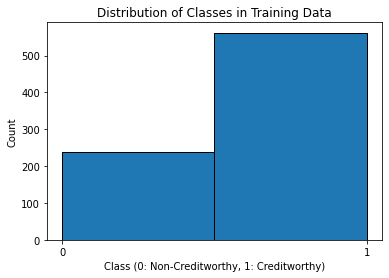

In [42]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [43]:
# Создание модели Logistic Regression
logistic_regression_model = LogisticRegression(solver='liblinear', max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Создание модели Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Создание модели K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

data = pd.read_csv('german.csv', sep=';')
X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid_tree = {
    'max_depth': [10, 15, 20, 25, 30, None],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', None]
}

decision_tree_model = DecisionTreeClassifier(random_state=42)
tree_grid = GridSearchCV(decision_tree_model, param_grid_tree, cv=5, scoring='roc_auc')
tree_grid.fit(X_train, y_train)

param_grid_knn = {
    'n_neighbors': [5, 7, 9, 11, 13],  
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='roc_auc')
knn_grid.fit(X_train, y_train)

param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10],  
    'penalty': ['l2'],
}

logistic_regression_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_grid = GridSearchCV(logistic_regression_model, param_grid_logistic, cv=5, scoring='roc_auc')
logistic_grid.fit(X_train, y_train)

y_prob_logistic = logistic_grid.predict_proba(X_test)[:, 1]
y_prob_decision_tree = tree_grid.predict_proba(X_test)[:, 1]
y_prob_knn = knn_grid.predict_proba(X_test)[:, 1]

roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

accuracy_logistic = accuracy_score(y_test, logistic_grid.predict(X_test))
accuracy_decision_tree = accuracy_score(y_test, tree_grid.predict(X_test))
accuracy_knn = accuracy_score(y_test, knn_grid.predict(X_test))

precision_logistic = precision_score(y_test, logistic_grid.predict(X_test))
precision_decision_tree = precision_score(y_test, tree_grid.predict(X_test))
precision_knn = precision_score(y_test, knn_grid.predict(X_test))

recall_logistic = recall_score(y_test, logistic_grid.predict(X_test))
recall_decision_tree = recall_score(y_test, tree_grid.predict(X_test))
recall_knn = recall_score(y_test, knn_grid.predict(X_test))

# Вывод результатов
print(f'Accuracy of Logistic Regression: {accuracy_logistic:.2f}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree:.2f}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn:.2f}')

print(f'ROC AUC of Logistic Regression: {roc_auc_logistic:.2f}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree:.2f}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn:.2f}')

print(f'Precision of Logistic Regression: {precision_logistic:.2f}')
print(f'Precision of Decision Tree: {precision_decision_tree:.2f}')
print(f'Precision of K-Nearest Neighbors: {precision_knn:.2f}')

print(f'Recall of Logistic Regression: {recall_logistic:.2f}')
print(f'Recall of Decision Tree: {recall_decision_tree:.2f}')
print(f'Recall of K-Nearest Neighbors: {recall_knn:.2f}')


Accuracy of Logistic Regression: 0.78
Accuracy of Decision Tree: 0.68
Accuracy of K-Nearest Neighbors: 0.76
ROC AUC of Logistic Regression: 0.82
ROC AUC of Decision Tree: 0.67
ROC AUC of K-Nearest Neighbors: 0.79
Precision of Logistic Regression: 0.80
Precision of Decision Tree: 0.78
Precision of K-Nearest Neighbors: 0.77
Recall of Logistic Regression: 0.90
Recall of Decision Tree: 0.75
Recall of K-Nearest Neighbors: 0.93


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели